# Part 1
### Expresses the central motivation of the project in one or two sentences. This may evolve a bit through the project.



The central motivation for this project is to predict strong indicators of co-morbid diseases using attributes from data for middle aged women’s yearly doctor visits. For this, we will be using a dataset of 10 yearly doctor's visits for a group of middle aged women who have responded to a series of questions about their health. 



# Part 2
### Gives a summary of the data processing pipeline so a technical expert can easily follow along

For our data processing, we needed to read in each of the files separately. Each is stored as a TSV file, named similarly except for the visit number at the end of the file name. So looping through the values of our visits using the function to read csv files from the pandas package, with a separator of \t rather than commas, we easily read our data into data frames. From here, we needed to add a column which stores the visit number, so for each row of the same patient id, we can distinguish from which visit this data was taken. 

When it came time to merge our datasets, we had to face our first problem in cleaning- inconsistent column names. The attributes in each data set have a specific name, followed by the number of the visit. For example, the CANCERS attribute, which asks if some health care provider had either told a patient that they had, or had treated them for cancer (other than skin cancer), is stored as CANCERS1 in the first visit data, but as CANCERS2 in our visit 2 data set, and so on. This meant that when merging our data frames, column names wouldn’t match, and so new columns would be added for each visits information. This quickly grew our data from and already massive 700 columns to over 8000 columns. To get around this, we removed the final number from each attribute name within each separate visit’s dataset, before we combined them. With this solution, our data was reduced to just over 1700 columns. This is still an issue for us, as it means some columns must still not line up, and it is something we are still actively working on.



We then started looking at columns that aren’t relevant to anything we’re interested in looking at. For example, there were over 10 columns per data set asking about the ages of people who live with a given patient. This information has essentially no use in our project, and is just further cluttering our data, so we decided to remove every column of this type, other than that of the actual patient's age. As we continue to find patterns in repetitive and unimportant columns, we will continue to reduce our attributes.

Finally, in cleaning our data, we wanted to try to remove null values. Some columns in our data are entirely null, and some contain very few actually responses and are mostly, though not entirely, null as well. We decided that the best strategy to start with would be to remove any column in which over 75% of all column entries are NaN. Columns with such little actual information may be unreliable, or may simply have no weight in our analysis since there are so few cases. Thus, we decided so focus on the columns which more reliably can give us real information to build off of. After completing all of these cleaning methods, our merged table has shrunk from 8000 columns to 800. As we implement our machine learning methods, we hope to distinguish more useful and unuseful attributes that can further help us narrow down our columns.

# Part 3


In [1]:
import pandas as pd
import numpy as np

data = pd.DataFrame()

# reading in each of our ten files
for i in range(1, 11):
    filename = f"0001-Data-{i}.tsv"
    
    # reading visit file into a dataframe
    with open(filename, "r") as infile:
        visit_data = pd.read_csv(infile, sep = "\t")
        
        # creating a column for the visit number
        visit_data["visit"] = i
        
        # removing the visit number from the end of each attribute name
        for col in visit_data.columns:
            if col[-len(str(i)):] == str(i):
                visit_data.rename(columns={col:col[:-len(str(i))]}, inplace=True)
        
        # adding this visit data back to the merged dataframe
        data = pd.concat([data, visit_data], ignore_index = True)

/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,51,52,53,54,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,85,87,88,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,477,478,482,483,484,485,486,490,491,495,504,506,507,515,522,530,536,537,538,539,577) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/

In [2]:
# replacing blank cells with NaN
data = data.replace(r'^\s*$', np.nan, regex=True)

for col in data.columns:
    # removing columns about family age
    if "AGE" in col and col != "AGE":
        del data[col]
    
    # removing columns with > 75% NaN values
    if col in data:
        nas = data[col].isna().sum()
        if nas > 3 * len(data[col]) / 4:
            del data[col]


In [3]:
data

,SWANID,VISIT,INTDAY,AGE,LANGINT,RACE,PREGNAN,EATDRIN,STRTPER,DAYBLE,...,OSTEIV1,OSTEON1,OSTNTW1,OSTN1W1,OSTEON2,OSTNTW2,OSTN1W2,SKCNCER,MECNCER,NMECNCR
0,10046,1,413,53,1,2,1,1,2,411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10056,1,357,52,1,4,1,1,2,377,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10092,1,364,46,1,4,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10126,1,442,50,1,1,1,1,2,453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10153,1,374,52,1,3,1,1,2,399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25482,99805,10,3661,52,1,1,1,1,1,NaN,...,1,1,-1,-1,-1,-1,-1,1,-1,-1
25483,99809,10,3624,53,1,4,1,1,2,NaN,...,1,1,-1,-1,-1,-1,-1,1,-1,-1
25484,99888,10,3661,58,1,3,1,1,1,NaN,...,1,1,-1,-1,-1,-1,-1,1,-1,-1
25485,99898,10,3626,55,1,4,1,1,1,NaN,...,1,1,-1,-1,-1,-1,-1,1,-1,-1


In [4]:
# replacing blank cells with NaN
data = data.replace(r'^\s*$', np.nan, regex=True)

for col in data.columns:
    # removing columns about family age
    if "AGE" in col and col != "AGE":
        del data[col]
    
    # removing columns with > 75% NaN values
    if col in data:
        nas = data[col].isna().sum()
        if nas > 3 * len(data[col]) / 4:
            del data[col]


# Part 4
### Builds two visualizations (graphs) from the data which characterize the distribution of the data itself in some interesting way. Your visualizations will be graded based on how much information they can effectively communicate with readers. Please make sure your visualizations are sufficiently distinct from each other.

For our visualizations, we built descriptive histograms for chosen features in order to better understand the distribution of physiological categories and other features of the data. Background research indicates that women with psychiatric conditions and emotion dysregulation may also have cardiovascular identifiers such as high blood pressure. We chose to plot histograms for questions features related to emotion regulation, diagnosis of high blood pressure, and feelings of mood for a given visit.

In [5]:
# read in the data for one visit
visit1_df = pd.read_spss('0001-Data.sav')

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use('seaborn')

### Begin exploring features for machine learning through descriptive statistics and visualizations

In [8]:
high_bp = visit1_df['HIGHBP5'].dropna()
high_bp.unique() # this question is coded as yes/no, but all columns vary considerable in data type retrieved

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [9]:
from collections import Counter

In [10]:
# count the frequency of high bp for all samples
cnt_highbp = Counter(high_bp)
cnts = cnt_highbp['Yes'], cnt_highbp['No']
cnts

(519, 2085)

<AxesSubplot:title={'center':'Women with High Blood Pressure'}>

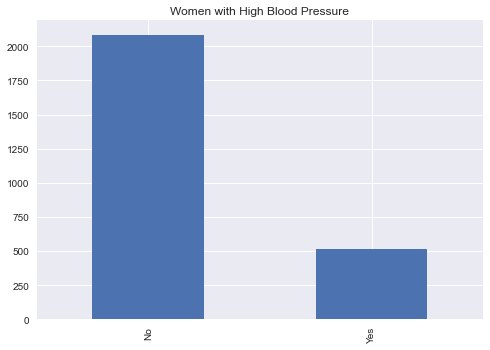

In [11]:
# high blood pressure
# yes/no question of whether this person has been diagnosed with high bp
visit1_df['HIGHBP5'].value_counts().plot(kind='bar', style='seaborn', title='Women with High Blood Pressure')

<AxesSubplot:title={'center':'Felt Happy'}>

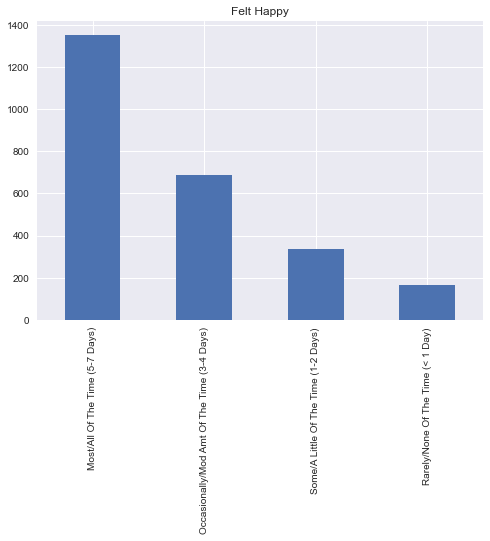

In [12]:
# felt happy
# this is a qualitative question asked on a likert scale about how happy the participant felt over the last week
visit1_df['HAPPY5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Happy')

<AxesSubplot:title={'center':'Felt Supported'}>

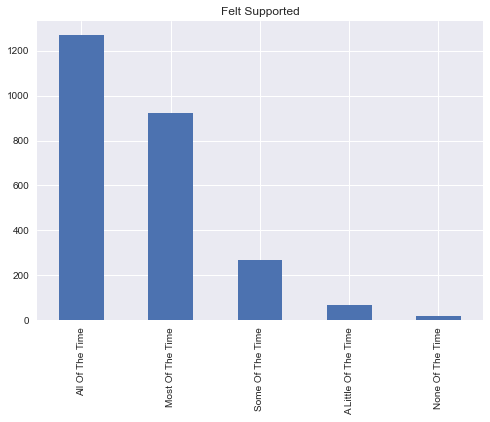

In [13]:
# asks participants if how much they felt supported and listened to
visit1_df['LISTEN5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Supported')

<AxesSubplot:title={'center':'Age'}>

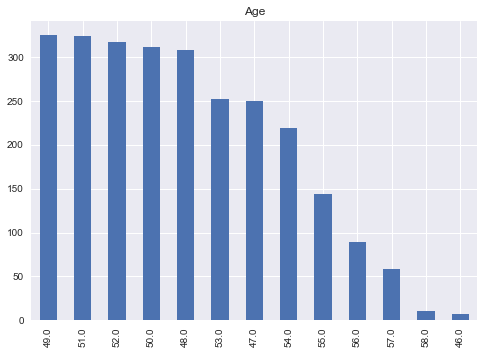

In [14]:
# in order to better understand the variability in age of participants
# visits are conducted every two years so at this particular visit, participants are about ten years into the study potentially
visit1_df['AGE5'].value_counts().plot(kind='bar', style='seaborn', title='Age')

<AxesSubplot:title={'center':'Felt Lonely'}>

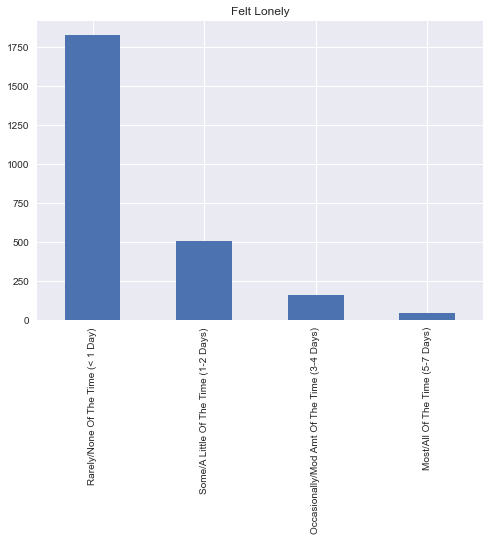

In [15]:

# asks participants about feelings of loneliness in a given time period
visit1_df['LONELY5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Lonely')

# Part 5
## Discuss what ML tools will be used and the relevant assumptions required to apply each. 

### Either: discuss why one algorithm may be chosen over the others or describe what subset of a whole suite of similar algorithms you’ll apply (its ok to say, ‘we’re going to try all of these because we don’t have reason to think one should be better than another’)

Classification algorithms use input data (“training data”) in order to predict the likelihood that some given data would fall into one of the categories determined by the training data. Since the problem at hand is one of classification, a handful of ML classification tools will be used. There are several algorithms available for this such as K Nearest neighbors and others including:

- Logistic Regression
- Naive Bayes
- Decision Tree
- Support Vector Machines

We may plan to first implement a regression model inorder to predict the likelihood of a given disorder given a constellation of features. We may implement features of cardiovascular healthy, emotion regulation, age, and history of psychiatric symptoms in order to predict a disease category. However, at this stage it is not abundantly clear which disorders will provide the most predictive power. Therefore, we plan to continue our analyses to further reduce the dimensionality of our features.